# g. Transfer study: VGG16 (pad 0)
- Train on Duke (400 cases)
- Validation on Duke (100 cases)
- Test on UAB (301 cases)

# Key step: Make numpy array
- make visual filed data into numpy.array

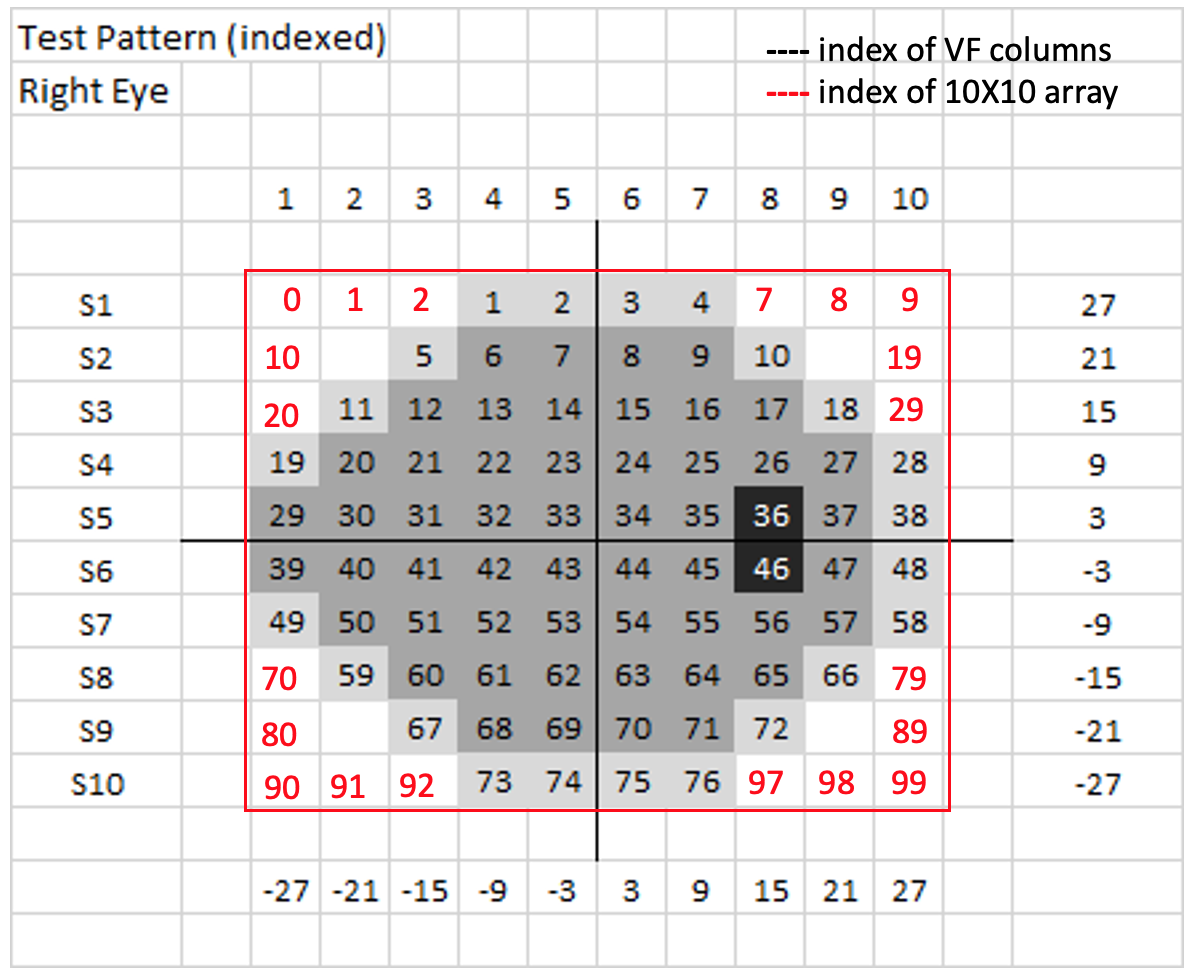

# 1. Make Visual Field Data into Numpy Array

In [1]:
import pandas as pd
import numpy as np

meta = pd.read_csv("0. meta.csv")
thr = pd.read_csv("1. thr.csv")
td = pd.read_csv("2. td.csv")
tdp = pd.read_csv("3. tdp.csv")

print("The shape of thr is", thr.shape)
thr.head()

The shape of thr is (500, 76)


,n9_s27_thr,n3_s27_thr,t3_s27_thr,t9_s27_thr,n15_s21_thr,n9_s21_thr,n3_s21_thr,t3_s21_thr,t9_s21_thr,t15_s21_thr,...,n15_i21_thr,n9_i21_thr,n3_i21_thr,t3_i21_thr,t9_i21_thr,t15_i21_thr,n9_i27_thr,n3_i27_thr,t3_i27_thr,t9_i27_thr
0,NaN,NaN,NaN,NaN,NaN,28,28,26,29,NaN,...,NaN,11,24,27,29,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,24,26,28,24,NaN,...,NaN,26,26,25,28,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,29,27,24,26,NaN,...,NaN,26,27,26,28,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,25,25,24,24,NaN,...,NaN,28,27,26,26,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,26,22,23,23,NaN,...,NaN,24,26,26,21,NaN,NaN,NaN,NaN,NaN


In [2]:
thr.iloc[499]   ### choose the last ROW

n9_s27_thr    NaN
n3_s27_thr    NaN
t3_s27_thr    NaN
t9_s27_thr    NaN
n15_s21_thr   NaN
               ..
t15_i21_thr   NaN
n9_i27_thr    NaN
n3_i27_thr    NaN
t3_i27_thr    NaN
t9_i27_thr    NaN
Name: 499, Length: 76, dtype: float64

In [3]:
thr = thr.fillna(0)
thr["2D"] = None   # np.NaN  # 0

In [4]:
print("The first cell of thr['2D'] is:", thr['2D'][0])
print("The shape of thr NOW is:", thr.shape)

The first cell of thr['2D'] is: None
The shape of thr NOW is: (500, 77)


## 1.1 Convert original 76 columns to 10X10 array
- 76 columns for Duke (b/c Duke has not only 24-2, but also 30-2)

In [5]:
import numpy as np

for i in range(thr.shape[0]):
    thr['2D'][i] = np.zeros((10, 10))
    
    # row 1
    thr['2D'][i][0, 3] = thr.iloc[i, 0]
    thr['2D'][i][0, 4] = thr.iloc[i, 1]
    thr['2D'][i][0, 5] = thr.iloc[i, 2]
    thr['2D'][i][0, 6] = thr.iloc[i, 3]
    
    # row 2
    thr['2D'][i][1, 2] = thr.iloc[i, 4]
    thr['2D'][i][1, 3] = thr.iloc[i, 5]
    thr['2D'][i][1, 4] = thr.iloc[i, 6]
    thr['2D'][i][1, 5] = thr.iloc[i, 7]
    thr['2D'][i][1, 6] = thr.iloc[i, 8]
    thr['2D'][i][1, 7] = thr.iloc[i, 9]
    
    # row 3
    thr['2D'][i][2, 1] = thr.iloc[i, 10]
    thr['2D'][i][2, 2] = thr.iloc[i, 11]
    thr['2D'][i][2, 3] = thr.iloc[i, 12]
    thr['2D'][i][2, 4] = thr.iloc[i, 13]
    thr['2D'][i][2, 5] = thr.iloc[i, 14]
    thr['2D'][i][2, 6] = thr.iloc[i, 15]
    thr['2D'][i][2, 7] = thr.iloc[i, 16]
    thr['2D'][i][2, 8] = thr.iloc[i, 17]
    
    # row 4
    thr['2D'][i][3, 0] = thr.iloc[i, 18]
    thr['2D'][i][3, 1] = thr.iloc[i, 19]
    thr['2D'][i][3, 2] = thr.iloc[i, 20]
    thr['2D'][i][3, 3] = thr.iloc[i, 21]
    thr['2D'][i][3, 4] = thr.iloc[i, 22]
    thr['2D'][i][3, 5] = thr.iloc[i, 23]
    thr['2D'][i][3, 6] = thr.iloc[i, 24]
    thr['2D'][i][3, 7] = thr.iloc[i, 25]
    thr['2D'][i][3, 8] = thr.iloc[i, 26]
    thr['2D'][i][3, 9] = thr.iloc[i, 27]
    
    # row 5
    thr['2D'][i][4, 0] = thr.iloc[i, 28]
    thr['2D'][i][4, 1] = thr.iloc[i, 29]
    thr['2D'][i][4, 2] = thr.iloc[i, 30]
    thr['2D'][i][4, 3] = thr.iloc[i, 31]
    thr['2D'][i][4, 4] = thr.iloc[i, 32]
    thr['2D'][i][4, 5] = thr.iloc[i, 33]
    thr['2D'][i][4, 6] = thr.iloc[i, 34]
    thr['2D'][i][4, 7] = thr.iloc[i, 35]
    thr['2D'][i][4, 8] = thr.iloc[i, 36]
    thr['2D'][i][4, 9] = thr.iloc[i, 37]
    
    # row 6
    thr['2D'][i][5, 0] = thr.iloc[i, 38]
    thr['2D'][i][5, 1] = thr.iloc[i, 39]
    thr['2D'][i][5, 2] = thr.iloc[i, 40]
    thr['2D'][i][5, 3] = thr.iloc[i, 41]
    thr['2D'][i][5, 4] = thr.iloc[i, 42] 
    thr['2D'][i][5, 5] = thr.iloc[i, 43]
    thr['2D'][i][5, 6] = thr.iloc[i, 44]
    thr['2D'][i][5, 7] = thr.iloc[i, 45]
    thr['2D'][i][5, 8] = thr.iloc[i, 46]
    thr['2D'][i][5, 9] = thr.iloc[i, 47]
    
    # row 7
    thr['2D'][i][6, 0] = thr.iloc[i, 48]
    thr['2D'][i][6, 1] = thr.iloc[i, 49]
    thr['2D'][i][6, 2] = thr.iloc[i, 50]
    thr['2D'][i][6, 3] = thr.iloc[i, 51]
    thr['2D'][i][6, 4] = thr.iloc[i, 52]
    thr['2D'][i][6, 5] = thr.iloc[i, 53]
    thr['2D'][i][6, 6] = thr.iloc[i, 54]
    thr['2D'][i][6, 7] = thr.iloc[i, 55]
    thr['2D'][i][6, 8] = thr.iloc[i, 56]
    thr['2D'][i][6, 9] = thr.iloc[i, 57]
        
    # row 8
    thr['2D'][i][7, 1] = thr.iloc[i, 58]
    thr['2D'][i][7, 2] = thr.iloc[i, 59]
    thr['2D'][i][7, 3] = thr.iloc[i, 60]
    thr['2D'][i][7, 4] = thr.iloc[i, 61]
    thr['2D'][i][7, 5] = thr.iloc[i, 62]
    thr['2D'][i][7, 6] = thr.iloc[i, 63]
    thr['2D'][i][7, 7] = thr.iloc[i, 64]
    thr['2D'][i][7, 8] = thr.iloc[i, 65]
    
    # row 9
    thr['2D'][i][8, 2] = thr.iloc[i, 66]
    thr['2D'][i][8, 3] = thr.iloc[i, 67]
    thr['2D'][i][8, 4] = thr.iloc[i, 68]
    thr['2D'][i][8, 5] = thr.iloc[i, 69]
    thr['2D'][i][8, 6] = thr.iloc[i, 70]
    thr['2D'][i][8, 7] = thr.iloc[i, 71]
    
    # row 10
    thr['2D'][i][9, 3] = thr.iloc[i, 72]
    thr['2D'][i][9, 4] = thr.iloc[i, 73]
    thr['2D'][i][9, 5] = thr.iloc[i, 74]
    thr['2D'][i][9, 6] = thr.iloc[i, 75]

/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
print("The shape of thr NOW is:", thr.shape)

The shape of thr NOW is: (500, 77)


In [7]:
print("1. The type of the first cell of thr['2D'] is:", type(thr["2D"][0]))
print("2. The shape of the first cell of thr['2D'] is:", thr["2D"][0].shape)
print("3. The first cell of thr['2D'] is:")
thr["2D"][0]

1. The type of the first cell of thr['2D'] is: <class 'numpy.ndarray'>
2. The shape of the first cell of thr['2D'] is: (10, 10)
3. The first cell of thr['2D'] is:


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 28., 28., 26., 29.,  0.,  0.,  0.],
       [ 0.,  0., 25., 29., 31., 29., 29., 30.,  0.,  0.],
       [ 0., 27., 30., 32., 31., 32., 31., 30., 27.,  0.],
       [24., 30., 31., 32., 33., 33., 34., 27., 27.,  0.],
       [22., 27., 30., 32., 34., 32., 32., 16., 27.,  0.],
       [ 0., 21., 23., 24., 30., 33., 31., 27., 25.,  0.],
       [ 0.,  0., 16., 23., 29., 31., 27., 26.,  0.,  0.],
       [ 0.,  0.,  0., 11., 24., 27., 29.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [8]:
thr["2D"][95]

array([[ 0.,  0.,  0., 20., 19., 21., 23.,  0.,  0.,  0.],
       [ 0.,  0., 22., 24., 24., 25., 24., 24.,  0.,  0.],
       [ 0., 24., 25., 25., 27., 29., 28., 28., 24.,  0.],
       [21., 25., 28., 29., 31., 32., 30., 29., 28., 20.],
       [24., 25., 27., 30., 31., 32., 31., 11., 25., 21.],
       [17., 24., 26., 28., 32., 32., 29., -1.,  6., 27.],
       [ 9.,  9., 16., 21., 30., 27., 21., -1.,  5., 12.],
       [ 0., -1., 11., -1., 13., -1., -1.,  4.,  5.,  0.],
       [ 0.,  0., -1., -1., -1.,  5.,  5.,  5.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  6., -1., -1.,  0.,  0.,  0.]])

### Visualization 1st
- original 10X10

Text(0.5, 1.0, '30-2')

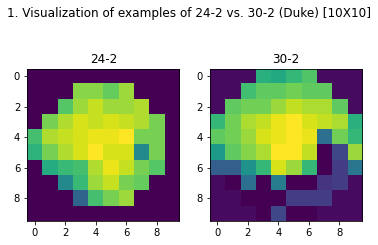

In [9]:
import matplotlib.pyplot as plt

figure, (ax1, ax2)= plt.subplots(1, 2)
figure.suptitle("1. Visualization of examples of 24-2 vs. 30-2 (Duke) [10X10]")

ax1.imshow(thr['2D'].iloc[0])
ax1.set_title("24-2")

ax2.imshow(thr['2D'].iloc[95])
ax2.set_title("30-2")

In [10]:
print(thr["2D"][95].shape)

(10, 10)


## 1. 2 Upsampling small images
- 10X10 --> 220X220
- using keras

In [11]:
from keras.layers import UpSampling2D, Input
from keras.models import Sequential, Model
import numpy as np

In [12]:
inputs = Input(shape = (10, 10, 1))
out = UpSampling2D(size = (22, 22))(inputs)
model = Model(inputs, out)

for i in range(thr.shape[0]):
    thr["2D"].iloc[i] = model.predict(
        np.reshape(thr["2D"].iloc[i], (1, 10, 10, 1)))
    thr["2D"].iloc[i] = np.reshape(thr["2D"].iloc[i], (220, 220))

2022-09-15 12:22:36.669556: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-15 12:22:36.688895: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7feb1bb4dd00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-09-15 12:22:36.688923: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_si

### Visualization 2nd
- upsampling 10X10 --> 220X220

Text(0.5, 1.0, '30-2')

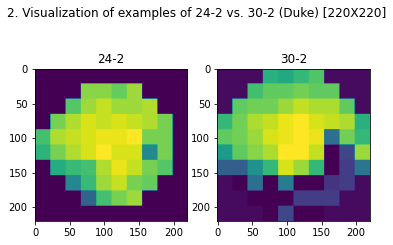

In [13]:
import matplotlib.pyplot as plt

figure, (ax1, ax2)= plt.subplots(1, 2)
figure.suptitle("2. Visualization of examples of 24-2 vs. 30-2 (Duke) [220X220]")

ax1.imshow(thr['2D'].iloc[0])
ax1.set_title("24-2")

ax2.imshow(thr['2D'].iloc[95])
ax2.set_title("30-2")

In [14]:
print(thr["2D"][95].shape)

(220, 220)


## 1.3 Padd 0
- pad 220X220 to 224X224 with 0

In [15]:
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

In [16]:
for i in range(thr.shape[0]):
    thr["2D"].iloc[i] = np.pad(thr["2D"].iloc[i], 2, pad_with, padder=0)

In [17]:
print(thr["2D"].iloc[1].shape)
thr["2D"].iloc[1]

(224, 224)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
print(thr["2D"].iloc[1].ravel().shape)
thr["2D"].iloc[1].ravel()

(50176,)


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [19]:
224*224

50176

### Visualization 3rd
- pad with 0: 220X220 --> 224X224

Text(0.5, 1.0, '30-2')

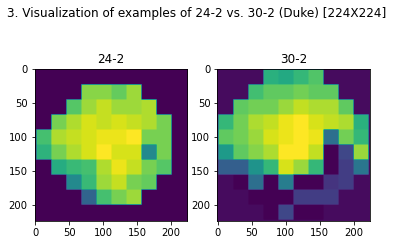

In [20]:
figure, (ax1, ax2)= plt.subplots(1, 2)
figure.suptitle("3. Visualization of examples of 24-2 vs. 30-2 (Duke) [224X224]")

ax1.imshow(thr['2D'].iloc[0])
ax1.set_title("24-2")

ax2.imshow(thr['2D'].iloc[95])
ax2.set_title("30-2")

In [21]:
print(thr["2D"][95].shape)

(224, 224)


# 2. How many 24-2 and 30-2?

In [22]:
print("The number of 30-2 pattern is:", 500 - meta["md_302"].isnull().sum())
print("The number of 24-2 pattern is:", 500 - meta["md_242"].isnull().sum())

The number of 30-2 pattern is: 14
The number of 24-2 pattern is: 486


# 3. Construct X

### 3.1 Important step 1
224 X 224 -> 224 X 224 X 3

In [23]:
thr.shape

(500, 77)

In [24]:
thr['2D'][1].shape

(224, 224)

In [25]:
for i in range(thr.shape[0]):
    list = [thr['2D'][i]]
    list.append(thr['2D'][i])
    list.append(thr['2D'][i])
    #copy_list.append(thr['2D'][i])
    thr['2D'][i] = np.array(list)
    #thr['2D'][i] = thr['2D'][i].reshape(224, 224, 3).astype('float32')

/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
thr['2D'].shape

(500,)

In [27]:
print(thr['2D'][1].shape)

(3, 224, 224)


In [28]:
for i in range(thr.shape[0]):
    thr['2D'][i] = thr['2D'][i].reshape(224, 224, 3).astype('float32')

/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
thr['2D'][1].shape

(224, 224, 3)

In [30]:
thr['2D'].shape

(500,)

### 3.2 Important step 2
224 X 224 X 3 -> 500 X 224 X 224 X 3

In [31]:
list = []
for i in range(thr.shape[0]):
    list.append(thr['2D'][i])

X = np.array(list)
X.shape

(500, 224, 224, 3)

In [32]:
X[95].shape

(224, 224, 3)

# 4. Construct Y

In [33]:
label = pd.read_csv("gradings_agreement_raw.csv")
print("The shape of lable is:", label.shape)
label.head()

The shape of lable is: (500, 15)


,pdf_filename,reliability,normal,gdefect1,gposition1,gdefect2,gposition2,gdefect3,gposition3,ngdefect1,ngposition1,ngdefect2,ngposition2,artifact1,artifact2
0,1.2.276.0.75.2.5.80.25.3.190123133923759.93180...,1,0,3,1,0,0,0,0,0,0,0,0,0,0
1,1.2.276.0.75.2.5.80.25.3.190123133924562.93180...,1,0,3,1,0,0,0,0,0,0,0,0,0,0
2,1.2.276.0.75.2.5.80.25.3.190123134232237.93180...,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1.2.276.0.75.2.5.80.25.3.190123134234418.93180...,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1.2.276.0.75.2.5.80.25.3.190123134640676.93180...,1,0,3,1,0,0,0,0,0,0,0,0,0,0


In [34]:
Y = label["normal"].to_numpy()
Y.shape

(500,)

# 5. Train-test split

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2)

In [36]:
x_train.shape

(400, 224, 224, 3)

In [37]:
x_val.shape

(100, 224, 224, 3)

In [38]:
y_train.shape

(400,)

In [39]:
y_val.shape

(100,)

# 6. Test dataset -- UAB

In [40]:
df = pd.read_csv("15. Grader1_labels_VF (normal + S.I.D corrected).csv")

l = ['Threshold_1', 'Threshold_2', 'Threshold_3', 'Threshold_4',
       'Threshold_5', 'Threshold_6', 'Threshold_7', 'Threshold_8',
       'Threshold_9', 'Threshold_10', 'Threshold_11', 'Threshold_12',
       'Threshold_13', 'Threshold_14', 'Threshold_15', 'Threshold_16',
       'Threshold_17', 'Threshold_18', 'Threshold_19', 'Threshold_20',
       'Threshold_21', 'Threshold_22', 'Threshold_23', 'Threshold_24',
       'Threshold_25', 'Threshold_26', 'Threshold_27', 'Threshold_28',
       'Threshold_29', 'Threshold_30', 'Threshold_31', 'Threshold_32',
       'Threshold_33', 'Threshold_34', 'Threshold_35', 'Threshold_36',
       'Threshold_37', 'Threshold_38', 'Threshold_39', 'Threshold_40',
       'Threshold_41', 'Threshold_42', 'Threshold_43', 'Threshold_44',
       'Threshold_45', 'Threshold_46', 'Threshold_47', 'Threshold_48',
       'Threshold_49', 'Threshold_50', 'Threshold_51', 'Threshold_52',
       'Threshold_53', 'Threshold_54']

thr_UAB = df[l]

thr_UAB['2D'] = None

/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## 6.1 Convert original 54 columns to 10X10 array
- 54 columns for UAB (b/c UAB only has 24-2)

In [41]:
for i in range(thr_UAB.shape[0]):
    thr_UAB['2D'][i] = np.zeros((10, 10))
    
    # row 2
    thr_UAB['2D'][i][1, 3] = thr_UAB.iloc[i, 0]
    thr_UAB['2D'][i][1, 4] = thr_UAB.iloc[i, 1]
    thr_UAB['2D'][i][1, 5] = thr_UAB.iloc[i, 2]
    thr_UAB['2D'][i][1, 6] = thr_UAB.iloc[i, 3]
    
    # row 3
    thr_UAB['2D'][i][2, 2] = thr_UAB.iloc[i, 4]
    thr_UAB['2D'][i][2, 3] = thr_UAB.iloc[i, 5]
    thr_UAB['2D'][i][2, 4] = thr_UAB.iloc[i, 6]
    thr_UAB['2D'][i][2, 5] = thr_UAB.iloc[i, 7]
    thr_UAB['2D'][i][2, 6] = thr_UAB.iloc[i, 8]
    thr_UAB['2D'][i][2, 7] = thr_UAB.iloc[i, 9]
    
    # row 4
    thr_UAB['2D'][i][3, 1] = thr_UAB.iloc[i, 10]
    thr_UAB['2D'][i][3, 2] = thr_UAB.iloc[i, 11]
    thr_UAB['2D'][i][3, 3] = thr_UAB.iloc[i, 12]
    thr_UAB['2D'][i][3, 4] = thr_UAB.iloc[i, 13]
    thr_UAB['2D'][i][3, 5] = thr_UAB.iloc[i, 14]
    thr_UAB['2D'][i][3, 6] = thr_UAB.iloc[i, 15]
    thr_UAB['2D'][i][3, 7] = thr_UAB.iloc[i, 16]
    thr_UAB['2D'][i][3, 8] = thr_UAB.iloc[i, 17]
    
    # row 5
    thr_UAB['2D'][i][4, 0] = thr_UAB.iloc[i, 18]
    thr_UAB['2D'][i][4, 1] = thr_UAB.iloc[i, 19]
    thr_UAB['2D'][i][4, 2] = thr_UAB.iloc[i, 20]
    thr_UAB['2D'][i][4, 3] = thr_UAB.iloc[i, 21]
    thr_UAB['2D'][i][4, 4] = thr_UAB.iloc[i, 22]
    thr_UAB['2D'][i][4, 5] = thr_UAB.iloc[i, 23]
    thr_UAB['2D'][i][4, 6] = thr_UAB.iloc[i, 24]
    thr_UAB['2D'][i][4, 7] = thr_UAB.iloc[i, 25]
    thr_UAB['2D'][i][4, 8] = thr_UAB.iloc[i, 26]
    
    # row 6
    thr_UAB['2D'][i][5, 0] = thr_UAB.iloc[i, 27]
    thr_UAB['2D'][i][5, 1] = thr_UAB.iloc[i, 28]
    thr_UAB['2D'][i][5, 2] = thr_UAB.iloc[i, 29]
    thr_UAB['2D'][i][5, 3] = thr_UAB.iloc[i, 30]
    thr_UAB['2D'][i][5, 4] = thr_UAB.iloc[i, 31] 
    thr_UAB['2D'][i][5, 5] = thr_UAB.iloc[i, 32]
    thr_UAB['2D'][i][5, 6] = thr_UAB.iloc[i, 33]
    thr_UAB['2D'][i][5, 7] = thr_UAB.iloc[i, 34]
    thr_UAB['2D'][i][5, 8] = thr_UAB.iloc[i, 35]
    
    # row 7
    thr_UAB['2D'][i][6, 1] = thr_UAB.iloc[i, 36]
    thr_UAB['2D'][i][6, 2] = thr_UAB.iloc[i, 37]
    thr_UAB['2D'][i][6, 3] = thr_UAB.iloc[i, 38]
    thr_UAB['2D'][i][6, 4] = thr_UAB.iloc[i, 39]
    thr_UAB['2D'][i][6, 5] = thr_UAB.iloc[i, 40]
    thr_UAB['2D'][i][6, 6] = thr_UAB.iloc[i, 41]
    thr_UAB['2D'][i][6, 7] = thr_UAB.iloc[i, 42]
    thr_UAB['2D'][i][6, 8] = thr_UAB.iloc[i, 43]
    
    # row 8
    thr_UAB['2D'][i][7, 2] = thr_UAB.iloc[i, 44]
    thr_UAB['2D'][i][7, 3] = thr_UAB.iloc[i, 45]
    thr_UAB['2D'][i][7, 4] = thr_UAB.iloc[i, 46]
    thr_UAB['2D'][i][7, 5] = thr_UAB.iloc[i, 47]
    thr_UAB['2D'][i][7, 6] = thr_UAB.iloc[i, 48]
    thr_UAB['2D'][i][7, 7] = thr_UAB.iloc[i, 49]
    
    # row 9
    thr_UAB['2D'][i][8, 3] = thr_UAB.iloc[i, 50]
    thr_UAB['2D'][i][8, 4] = thr_UAB.iloc[i, 51]
    thr_UAB['2D'][i][8, 5] = thr_UAB.iloc[i, 52]
    thr_UAB['2D'][i][8, 6] = thr_UAB.iloc[i, 53]

/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Visualization 1st
- original 10X10

Text(0.5, 1.0, '2nd')

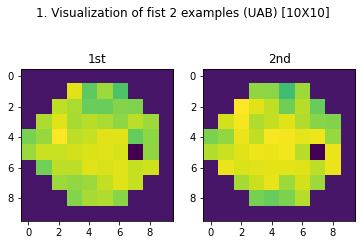

In [42]:
import matplotlib.pyplot as plt

figure, (ax1, ax2)= plt.subplots(1, 2)
figure.suptitle("1. Visualization of fist 2 examples (UAB) [10X10]")

ax1.imshow(thr_UAB['2D'][0])
ax1.set_title("1st")

ax2.imshow(thr_UAB['2D'][1])
ax2.set_title("2nd")

In [43]:
print(thr_UAB["2D"][0].shape)

(10, 10)


## 6. 2 Upsampling small images
- 10X10 --> 220X220
- using keras

In [44]:
inputs = Input(shape = (10, 10, 1))
out = UpSampling2D(size = (22, 22))(inputs)
model = Model(inputs, out)

for i in range(thr_UAB.shape[0]):
    thr_UAB["2D"].iloc[i] = model.predict(
        np.reshape(thr_UAB["2D"].iloc[i], (1, 10, 10, 1)))
    thr_UAB["2D"].iloc[i] = np.reshape(thr_UAB["2D"].iloc[i], (220, 220))

/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Visualization 2nd
- upsampling 10X10 --> 220X220

Text(0.5, 1.0, '2nd')

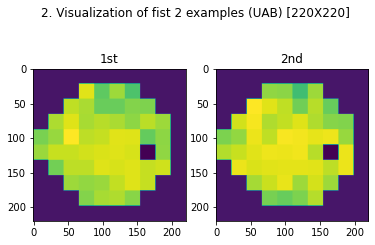

In [45]:
import matplotlib.pyplot as plt

figure, (ax1, ax2)= plt.subplots(1, 2)
figure.suptitle("2. Visualization of fist 2 examples (UAB) [220X220]")

ax1.imshow(thr_UAB['2D'][0])
ax1.set_title("1st")

ax2.imshow(thr_UAB['2D'][1])
ax2.set_title("2nd")

In [46]:
print(thr_UAB["2D"][0].shape)

(220, 220)


## 6.3 Padd 0
- pad 220X220 to 224X224 with 0

In [47]:
for i in range(thr_UAB.shape[0]):
    thr_UAB["2D"].iloc[i] = np.pad(thr_UAB["2D"].iloc[i], 2, pad_with, padder=0)

In [48]:
print(thr_UAB["2D"].iloc[1].shape)
thr_UAB["2D"].iloc[1]

(224, 224)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [49]:
print(thr_UAB["2D"].iloc[1].ravel().shape)
thr_UAB["2D"].iloc[1].ravel()

(50176,)


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [50]:
224*224

50176

### Visualization 3rd
- pad with 0: 220X220 --> 224X224

Text(0.5, 1.0, '2nd')

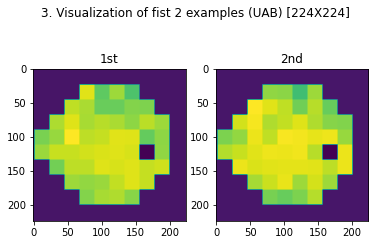

In [51]:
import matplotlib.pyplot as plt

figure, (ax1, ax2)= plt.subplots(1, 2)
figure.suptitle("3. Visualization of fist 2 examples (UAB) [224X224]")

ax1.imshow(thr_UAB['2D'][0])
ax1.set_title("1st")

ax2.imshow(thr_UAB['2D'][1])
ax2.set_title("2nd")

In [52]:
print(thr_UAB["2D"][0].shape)

(224, 224)


### Important step 1
- 224 X 224 -> 224 X 224 X 3

In [53]:
thr_UAB.shape

(301, 55)

In [54]:
thr_UAB['2D'][1].shape

(224, 224)

In [55]:
for i in range(thr_UAB.shape[0]):
    list = [thr_UAB['2D'][i]]
    list.append(thr_UAB['2D'][i])
    list.append(thr_UAB['2D'][i])
    thr_UAB['2D'][i] = np.array(list)

/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [56]:
thr_UAB['2D'].shape

(301,)

In [57]:
print(thr_UAB['2D'][1].shape)

(3, 224, 224)


In [58]:
for i in range(thr_UAB.shape[0]):
    thr_UAB['2D'][i] = thr_UAB['2D'][i].reshape(224, 224, 3).astype('float32')

/Users/yuhuicao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
thr_UAB['2D'][1].shape

(224, 224, 3)

In [60]:
thr_UAB['2D'].shape

(301,)

### Important step 2
- 224 X 224 X 3 -> 500 X 224 X 224 X 3

In [61]:
list = []
for i in range(thr_UAB.shape[0]):
    list.append(thr_UAB['2D'][i])

X_UAB = np.array(list)
X_UAB.shape

(301, 224, 224, 3)

### Construct Y

In [62]:
Y_UAB = df["normal"].to_numpy()
Y_UAB.shape

(301,)

# 7. Fit VGG16 architecture (ImageNet)
on 400 Duke data

# 8. Validation
on 100 Duke data

# 9. Test
on 301 UAB data

Let's start by importing the keras libraries and the packages that we would need to build a neural network.

In [63]:
import numpy as np 
import pandas as pd 
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage import io

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50 
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

In [64]:
model = VGG16(include_top=True, weights='imagenet')
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [65]:
transfer_layer = model.get_layer('block5_pool')
vgg_model = Model(inputs=model.input,
                   outputs=transfer_layer.output)

In [66]:
## Now, choose which layers of VGG16 we actually want to fine-tune
## Here, we'll freeze all but the last convolutional layer

## Add some code here to freeze all but the last convolutional layer:
##### Your code here ######
for layer in vgg_model.layers[0:17]:
    layer.trainable = False

In [67]:
## Check to make sure you froze the right ones: 
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_3 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 True
block5_pool True


### 1. Build a simple sequential model using only the VGG16 architecture

In [68]:
## Build your model using the mostly-frozen VGG16 architecture: 
model1 = Sequential()

# Add the convolutional part of the VGG16 model from above.
model1.add(vgg_model)

# Flatten the output of the VGG16 model because it is from a convolutional layer.
model1.add(Flatten())

# Add a dense (aka. fully-connected) layer.
model1.add(Dense(1, activation='sigmoid'))

In [108]:
## Set optimizer, loss function, and learning rate 

optimizer = Adam(lr=1e-4)
loss = 'binary_crossentropy'
metrics = ['accuracy', 'AUC', 
           "Recall", 
           "TruePositives", "TrueNegatives", "FalsePositives", "FalseNegatives"]
epochs = 15

In [109]:
model1.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [110]:
## Run 15 epochs
history1 = model1.fit(x_train, y_train, 
              validation_data = (x_val, y_val), 
              epochs = epochs)

Epoch 1/15
13/13 [==============================] - 137s 11s/step - loss: 0.3752 - accuracy: 0.8000 - auc: 0.8991 - recall: 0.7226 - true_positives: 99.0000 - true_negatives: 221.0000 - false_positives: 42.0000 - false_negatives: 38.0000 - val_loss: 0.3782 - val_accuracy: 0.8500 - val_auc: 0.9231 - val_recall: 0.8542 - val_true_positives: 41.0000 - val_true_negatives: 44.0000 - val_false_positives: 8.0000 - val_false_negatives: 7.0000
Epoch 2/15
13/13 [==============================] - 126s 10s/step - loss: 0.2636 - accuracy: 0.8800 - auc: 0.9532 - recall: 0.8321 - true_positives: 114.0000 - true_negatives: 238.0000 - false_positives: 25.0000 - false_negatives: 23.0000 - val_loss: 0.3908 - val_accuracy: 0.8600 - val_auc: 0.9277 - val_recall: 0.8333 - val_true_positives: 40.0000 - val_true_negatives: 46.0000 - val_false_positives: 6.0000 - val_false_negatives: 8.0000
Epoch 3/15
13/13 [==============================] - 153s 12s/step - loss: 0.2201 - accuracy: 0.9125 - auc: 0.9719 - recal

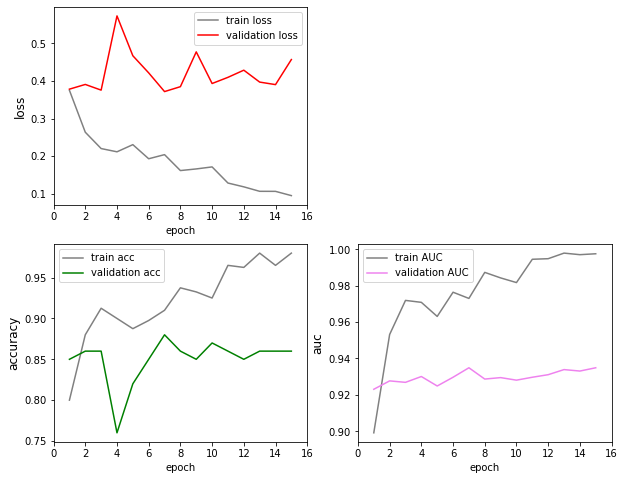

In [111]:
plt.figure(figsize=(10, 8))
start_epoch = 1

# 1. plot the Train/val curve for loss #for the first iteration
plt.subplot(221)
#plt.title('Train/val LOSS')
plt.plot(np.arange(start_epoch,epochs+1), history1.history['loss'][start_epoch-1:],label='train loss', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history1.history['val_loss'][start_epoch-1:],label='validation loss', color = 'red')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('loss', size = 12)
plt.legend()


# 3. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(223)
#plt.title('Train/val ACCURACY')
plt.plot(np.arange(start_epoch,epochs+1), history1.history['accuracy'][start_epoch-1:],label='train acc', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history1.history['val_accuracy'][start_epoch-1:],label='validation acc', color = 'green')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('accuracy', size = 12)
plt.legend()

# 4. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(224)
#plt.title('Train/val AUC')
plt.plot(np.arange(start_epoch,epochs+1), history1.history['auc'][start_epoch-1:],label='train AUC', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history1.history['val_auc'][start_epoch-1:],label='validation AUC', color = 'violet')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('auc', size = 12)
plt.legend()

plt.show()



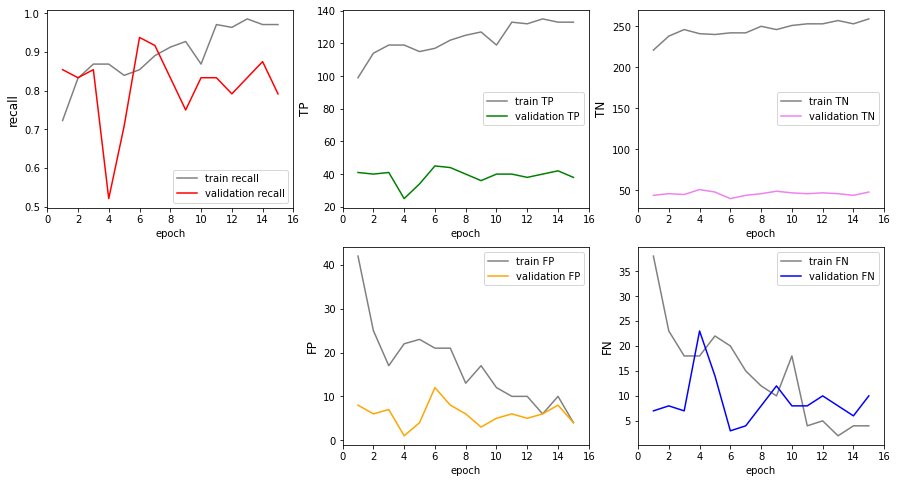

In [118]:
plt.figure(figsize=(15, 8))
start_epoch = 1

# 1. plot the Train/val curve for loss #for the first iteration
plt.subplot(231)
#plt.title('Train/val LOSS')
plt.plot(np.arange(start_epoch,epochs+1), history1.history['recall'][start_epoch-1:],label='train recall', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history1.history['val_recall'][start_epoch-1:],label='validation recall', color = 'red')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('recall', size = 12)
plt.legend()


# 2. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(232)
#plt.title('Train/val ACCURACY')
plt.plot(np.arange(start_epoch,epochs+1), history1.history['true_positives'][start_epoch-1:],label='train TP', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history1.history['val_true_positives'][start_epoch-1:],label='validation TP', color = 'green')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('TP', size = 12)
plt.legend()

# 3. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(233)
#plt.title('Train/val AUC')
plt.plot(np.arange(start_epoch,epochs+1), history1.history['true_negatives'][start_epoch-1:],label='train TN', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history1.history['val_true_negatives'][start_epoch-1:],label='validation TN', color = 'violet')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('TN', size = 12)
plt.legend()

# 4. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(235)
#plt.title('Train/val AUC')
plt.plot(np.arange(start_epoch,epochs+1), history1.history['false_positives'][start_epoch-1:],label='train FP', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history1.history['val_false_positives'][start_epoch-1:],label='validation FP', color = 'orange')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('FP', size = 12)
plt.legend()

# 5. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(236)
#plt.title('Train/val AUC')
plt.plot(np.arange(start_epoch,epochs+1), history1.history['false_negatives'][start_epoch-1:],label='train FN', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history1.history['val_false_negatives'][start_epoch-1:],label='validation FN', color = 'blue')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('FN', size = 12)
plt.legend()

plt.show()

In [155]:
#sens = TP/(TP + FN)
#spec = TN/(TN + FP)

In [184]:
#sens = TP/(TP + FN)
#spec = TN/(TN + FP)

TP = pd.DataFrame(history1.history['true_positives'], columns = ['TP'])
TN = pd.DataFrame(history1.history['true_negatives'], columns = ['TN'])
FP = pd.DataFrame(history1.history['false_positives'], columns = ['FP'])
FN = pd.DataFrame(history1.history['false_negatives'], columns = ['FN'])
df = pd.concat([TP, TN, FP, FN], axis = 1)
df["sens"] = df["TP"]/(df["TP"] + df["FN"])
df["spec"] = df["TN"]/(df["TN"] + df["FP"])
df

,TP,TN,FP,FN,sens,spec
0,99.0,221.0,42.0,38.0,0.722628,0.840304
1,114.0,238.0,25.0,23.0,0.832117,0.904943
2,119.0,246.0,17.0,18.0,0.868613,0.935361
3,119.0,241.0,22.0,18.0,0.868613,0.916350
4,115.0,240.0,23.0,22.0,0.839416,0.912548
5,117.0,242.0,21.0,20.0,0.854015,0.920152
6,122.0,242.0,21.0,15.0,0.890511,0.920152
7,125.0,250.0,13.0,12.0,0.912409,0.950570
8,127.0,246.0,17.0,10.0,0.927007,0.935361
9,119.0,251.0,12.0,18.0,0.868613,0.954373


In [189]:
TP_val = pd.DataFrame(history1.history['val_true_positives'], columns = ['TP_val'])
TN_val = pd.DataFrame(history1.history['val_true_negatives'], columns = ['TN_val'])
FP_val = pd.DataFrame(history1.history['val_false_positives'], columns = ['FP_val'])
FN_val = pd.DataFrame(history1.history['val_false_negatives'], columns = ['FN_val'])
val_df = pd.concat([TP_val, TN_val, FP_val, FN_val], axis = 1)
val_df["sens_val"] = val_df["TP_val"]/(val_df["TP_val"] + val_df["FN_val"])
val_df["spec_val"] = val_df["TN_val"]/(val_df["TN_val"] + val_df["FP_val"])
val_df


,TP_val,TN_val,FP_val,FN_val,sens_val,spec_val
0,41.0,44.0,8.0,7.0,0.854167,0.846154
1,40.0,46.0,6.0,8.0,0.833333,0.884615
2,41.0,45.0,7.0,7.0,0.854167,0.865385
3,25.0,51.0,1.0,23.0,0.520833,0.980769
4,34.0,48.0,4.0,14.0,0.708333,0.923077
5,45.0,40.0,12.0,3.0,0.937500,0.769231
6,44.0,44.0,8.0,4.0,0.916667,0.846154
7,40.0,46.0,6.0,8.0,0.833333,0.884615
8,36.0,49.0,3.0,12.0,0.750000,0.942308
9,40.0,47.0,5.0,8.0,0.833333,0.903846


## Evaluation Metrics:
['loss', 
'accuracy', 
'AUC', 
"Recall", 
"TruePositives", 
"TrueNegatives", 
"FalsePositives", 
"FalseNegatives"]

In [74]:
# evaluate the model
val_scores = model1.evaluate(x_val, y_val, verbose=0)
print(" loss: {} \n accuracy: {} \n auc {} \n Recall {} \n TruePositive {} \n TrueNegative {} \n FalsePositive {} \n FalsNegative {}"
      .format(val_scores[0], val_scores[1], val_scores[2], val_scores[3], 
              val_scores[4], val_scores[5], val_scores[6], val_scores[7]
             ))

 loss: 0.29676324129104614 
 accuracy: 0.9399999976158142 
 auc 0.9800347089767456 
 Recall 0.9166666865348816 
 TruePositive 33.0 
 TrueNegative 61.0 
 FalsePositive 3.0 
 FalsNegative 3.0


In [75]:
# test the model
test_scores = model1.evaluate(X_UAB, Y_UAB, verbose=0)
print(" loss: {} \n accuracy: {} \n auc {} \n Recall {} \n TruePositive {} \n TrueNegative {} \n FalsePositive {} \n FalsNegative {}"
      .format(test_scores[0], test_scores[1], test_scores[2], test_scores[3], 
              test_scores[4], test_scores[5], test_scores[6], test_scores[7]
             ))

 loss: 0.3788638412952423 
 accuracy: 0.7873753905296326 
 auc 0.9170076847076416 
 Recall 0.9130434989929199 
 TruePositive 42.0 
 TrueNegative 195.0 
 FalsePositive 60.0 
 FalsNegative 4.0


In [76]:
df_val = pd.DataFrame(index=['loss', 'accuracy', 'auc', 'recall', 'TP', 'TN', 'FP', 'FN'])
df_val['validation (M1)'] = val_scores

df_test = pd.DataFrame(index=['loss', 'accuracy', 'auc', 'recall', 'TP', 'TN', 'FP', 'FN'])
df_test['test (M1)'] = test_scores

model_1 = pd.concat([df_val, df_test], axis = 1)
model_1

,validation (M1),test (M1)
loss,0.296763,0.378864
accuracy,0.940000,0.787375
auc,0.980035,0.917008
recall,0.916667,0.913043
TP,33.000000,42.000000
TN,61.000000,195.000000
FP,3.000000,60.000000
FN,3.000000,4.000000


### 2. Let's try another experiment where we add a few more dense layers:

In [194]:
model2 = Sequential()

# Add the convolutional part of the VGG16 model from above.
model2.add(vgg_model)

# Flatten the output of the VGG16 model because it is from a
# convolutional layer.
model2.add(Flatten())

# Add a couple of dense (aka. fully-connected) layers.

###############
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(512, activation='relu'))

# Change the activation function to sigmoid 
# so output of the last layer is in the range of [0,1] 
model2.add(Dense(1, activation='sigmoid'))

In [195]:
model2.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [196]:
## Run 15 epochs 
history2 = model2.fit(x_train, y_train, 
              validation_data = (x_val, y_val), 
              epochs = epochs)

Epoch 1/15
13/13 [==============================] - 126s 10s/step - loss: 0.9793 - accuracy: 0.7050 - auc: 0.7504 - recall: 0.6131 - true_positives: 84.0000 - true_negatives: 198.0000 - false_positives: 65.0000 - false_negatives: 53.0000 - val_loss: 0.4018 - val_accuracy: 0.8600 - val_auc: 0.9143 - val_recall: 0.8542 - val_true_positives: 41.0000 - val_true_negatives: 45.0000 - val_false_positives: 7.0000 - val_false_negatives: 7.0000
Epoch 2/15
13/13 [==============================] - 167s 13s/step - loss: 0.2592 - accuracy: 0.8850 - auc: 0.9543 - recall: 0.8467 - true_positives: 116.0000 - true_negatives: 238.0000 - false_positives: 25.0000 - false_negatives: 21.0000 - val_loss: 0.5674 - val_accuracy: 0.8000 - val_auc: 0.9255 - val_recall: 0.6458 - val_true_positives: 31.0000 - val_true_negatives: 49.0000 - val_false_positives: 3.0000 - val_false_negatives: 17.0000
Epoch 3/15
13/13 [==============================] - 126s 10s/step - loss: 0.2075 - accuracy: 0.8950 - auc: 0.9688 - reca

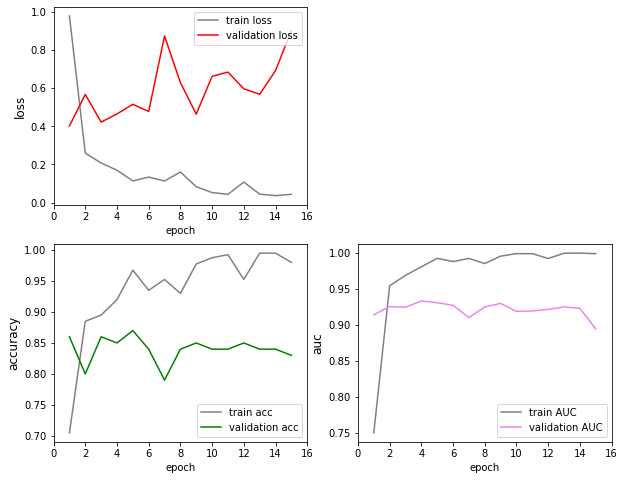

In [197]:
plt.figure(figsize=(10, 8))
start_epoch = 1

# 1. plot the Train/val curve for loss #for the first iteration
plt.subplot(221)
#plt.title('Train/val LOSS')
plt.plot(np.arange(start_epoch,epochs+1), history2.history['loss'][start_epoch-1:],label='train loss', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history2.history['val_loss'][start_epoch-1:],label='validation loss', color = 'red')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('loss', size = 12)
plt.legend()


# 3. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(223)
#plt.title('Train/val ACCURACY')
plt.plot(np.arange(start_epoch,epochs+1), history2.history['accuracy'][start_epoch-1:],label='train acc', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history2.history['val_accuracy'][start_epoch-1:],label='validation acc', color = 'green')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('accuracy', size = 12)
plt.legend()

# 4. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(224)
#plt.title('Train/val AUC')
plt.plot(np.arange(start_epoch,epochs+1), history2.history['auc'][start_epoch-1:],label='train AUC', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history2.history['val_auc'][start_epoch-1:],label='validation AUC', color = 'violet')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('auc', size = 12)
plt.legend()

plt.show()

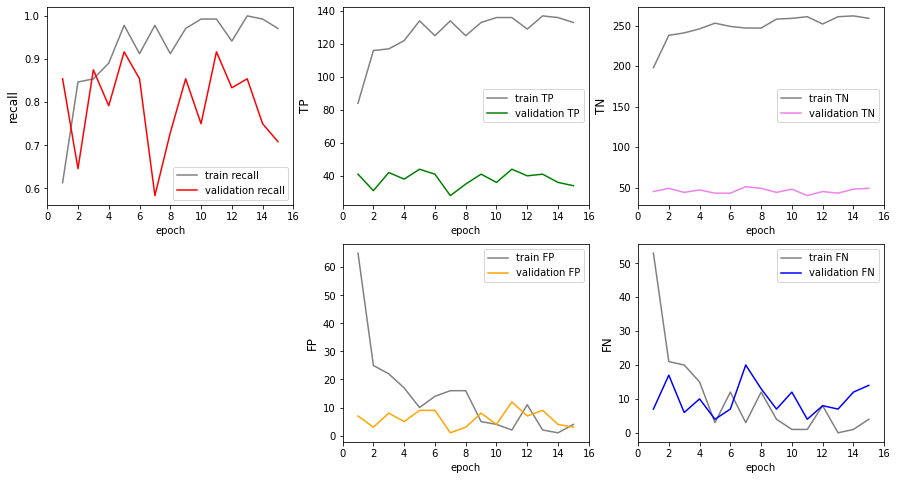

In [198]:
plt.figure(figsize=(15, 8))
start_epoch = 1

# 1. plot the Train/val curve for loss #for the first iteration
plt.subplot(231)
#plt.title('Train/val LOSS')
plt.plot(np.arange(start_epoch,epochs+1), history2.history['recall'][start_epoch-1:],label='train recall', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history2.history['val_recall'][start_epoch-1:],label='validation recall', color = 'red')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('recall', size = 12)
plt.legend()


# 2. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(232)
#plt.title('Train/val ACCURACY')
plt.plot(np.arange(start_epoch,epochs+1), history2.history['true_positives'][start_epoch-1:],label='train TP', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history2.history['val_true_positives'][start_epoch-1:],label='validation TP', color = 'green')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('TP', size = 12)
plt.legend()

# 3. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(233)
#plt.title('Train/val AUC')
plt.plot(np.arange(start_epoch,epochs+1), history2.history['true_negatives'][start_epoch-1:],label='train TN', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history2.history['val_true_negatives'][start_epoch-1:],label='validation TN', color = 'violet')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('TN', size = 12)
plt.legend()

# 4. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(235)
#plt.title('Train/val AUC')
plt.plot(np.arange(start_epoch,epochs+1), history2.history['false_positives'][start_epoch-1:],label='train FP', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history2.history['val_false_positives'][start_epoch-1:],label='validation FP', color = 'orange')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('FP', size = 12)
plt.legend()

# 5. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(236)
#plt.title('Train/val AUC')
plt.plot(np.arange(start_epoch,epochs+1), history2.history['false_negatives'][start_epoch-1:],label='train FN', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history2.history['val_false_negatives'][start_epoch-1:],label='validation FN', color = 'blue')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('FN', size = 12)
plt.legend()

plt.show()

In [ ]:
#sens = TP/(TP + FN)
#spec = TN/(TN + FP)

TP = pd.DataFrame(history1.history['true_positives'], columns = ['TP'])
TN = pd.DataFrame(history1.history['true_negatives'], columns = ['TN'])
FP = pd.DataFrame(history1.history['false_positives'], columns = ['FP'])
FN = pd.DataFrame(history1.history['false_negatives'], columns = ['FN'])
df = pd.concat([TP, TN, FP, FN], axis = 1)
df["sens"] = df["TP"]/(df["TP"] + df["FN"])
df["spec"] = df["TN"]/(df["TN"] + df["FP"])
df

## Evaluation Metrics:
['loss', 
'accuracy', 
'AUC', 
"Recall", 
"TruePositives", 
"TrueNegatives", 
"FalsePositives", 
"FalseNegatives"]

In [77]:
# evaluate the model
val_scores = model2.evaluate(x_val, y_val, verbose=0)
print(" loss: {} \n accuracy: {} \n auc {} \n Recall {} \n TruePositive {} \n TrueNegative {} \n FalsePositive {} \n FalsNegative {}"
      .format(val_scores[0], val_scores[1], val_scores[2], val_scores[3], 
              val_scores[4], val_scores[5], val_scores[6], val_scores[7]
             ))

 loss: 0.19972003996372223 
 accuracy: 0.9700000286102295 
 auc 0.9791666865348816 
 Recall 0.9444444179534912 
 TruePositive 34.0 
 TrueNegative 63.0 
 FalsePositive 1.0 
 FalsNegative 2.0


In [78]:
# test the model
test_scores = model2.evaluate(X_UAB, Y_UAB, verbose=0)
print(" loss: {} \n accuracy: {} \n auc {} \n Recall {} \n TruePositive {} \n TrueNegative {} \n FalsePositive {} \n FalsNegative {}"
      .format(test_scores[0], test_scores[1], test_scores[2], test_scores[3], 
              test_scores[4], test_scores[5], test_scores[6], test_scores[7]
             ))

 loss: 0.3952430784702301 
 accuracy: 0.7973421812057495 
 auc 0.9028558731079102 
 Recall 0.8695651888847351 
 TruePositive 40.0 
 TrueNegative 200.0 
 FalsePositive 55.0 
 FalsNegative 6.0


In [79]:
df_val = pd.DataFrame(index=['loss', 'accuracy', 'auc', 'recall', 'TP', 'TN', 'FP', 'FN'])
df_val['validation (M2)'] = val_scores

df_test = pd.DataFrame(index=['loss', 'accuracy', 'auc', 'recall', 'TP', 'TN', 'FP', 'FN'])
df_test['test (M2)'] = test_scores

model_2 = pd.concat([df_val, df_test], axis = 1)
model_2

,validation (M2),test (M2)
loss,0.199720,0.395243
accuracy,0.970000,0.797342
auc,0.979167,0.902856
recall,0.944444,0.869565
TP,34.000000,40.000000
TN,63.000000,200.000000
FP,1.000000,55.000000
FN,2.000000,6.000000


### 3. Now let's add dropout and another fully connected layer:

In [199]:
model3 = Sequential()

# Add the convolutional part of the VGG16 model from above.
model3.ad d(vgg_model)

# Flatten the output of the VGG16 model because it is from a
# convolutional layer.
model3.add(Flatten())

# Add several fully-connected layers with dropout
##### ###### ######
# Dropout-layer: may prevent overfitting and
# improve generalization ability to test-set
model3.add(Dropout(0.5))

# Add a dense (aka. fully-connected) layer.
model3.add(Dense(1024, activation='relu'))

# Dropout-layer: may prevent overfitting and
# improve generalization ability to test-set
model3.add(Dropout(0.5))

# Add a dense (aka. fully-connected) layer;
# combining features that VGG16 has recognized in the image.
model3.add(Dense(512, activation='relu'))

# Dropout-layer: may prevent overfitting and
# improve generalization ability to test-set
model3.add(Dropout(0.5))

# Add a dense (aka. fully-connected) layer;
# combining features that VGG16 has recognized in the image.
model3.add(Dense(256, activation='relu'))

##### ##### ######

# Final output layer
# Add a dense (aka. fully-connected) layer.
# Change the activation function to sigmoid 
# so output of the last layer is in the range of [0,1] 
model3.add(Dense(1, activation='sigmoid'))

In [200]:
model3.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [201]:
## Run 15 epochs
history3 = model3.fit(x_train, y_train, 
              validation_data = (x_val, y_val), 
              epochs = epochs)

Epoch 1/15
13/13 [==============================] - 129s 10s/step - loss: 0.4231 - accuracy: 0.7900 - auc: 0.8716 - recall: 0.6277 - true_positives: 86.0000 - true_negatives: 230.0000 - false_positives: 33.0000 - false_negatives: 51.0000 - val_loss: 0.4922 - val_accuracy: 0.8400 - val_auc: 0.9191 - val_recall: 0.7917 - val_true_positives: 38.0000 - val_true_negatives: 46.0000 - val_false_positives: 6.0000 - val_false_negatives: 10.0000
Epoch 2/15
13/13 [==============================] - 126s 10s/step - loss: 0.2684 - accuracy: 0.8850 - auc: 0.9501 - recall: 0.8175 - true_positives: 112.0000 - true_negatives: 242.0000 - false_positives: 21.0000 - false_negatives: 25.0000 - val_loss: 0.5183 - val_accuracy: 0.8600 - val_auc: 0.9251 - val_recall: 0.8333 - val_true_positives: 40.0000 - val_true_negatives: 46.0000 - val_false_positives: 6.0000 - val_false_negatives: 8.0000
Epoch 3/15
13/13 [==============================] - 116s 9s/step - loss: 0.1874 - accuracy: 0.9225 - auc: 0.9771 - recal

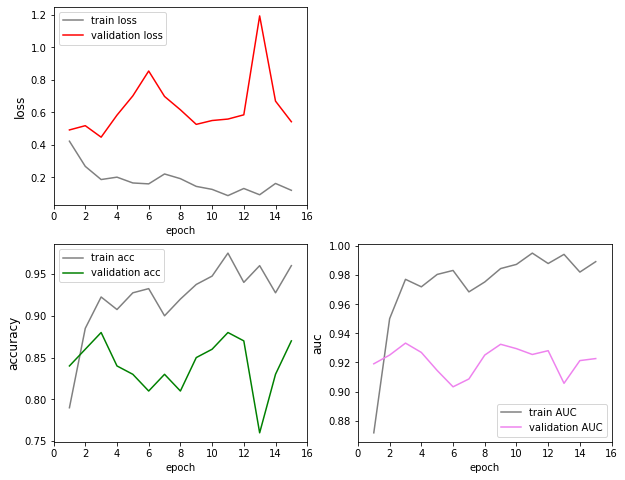

In [202]:
plt.figure(figsize=(10, 8))
start_epoch = 1

# 1. plot the Train/val curve for loss #for the first iteration
plt.subplot(221)
#plt.title('Train/val LOSS')
plt.plot(np.arange(start_epoch,epochs+1), history3.history['loss'][start_epoch-1:],label='train loss', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history3.history['val_loss'][start_epoch-1:],label='validation loss', color = 'red')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('loss', size = 12)
plt.legend()


# 3. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(223)
#plt.title('Train/val ACCURACY')
plt.plot(np.arange(start_epoch,epochs+1), history3.history['accuracy'][start_epoch-1:],label='train acc', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history3.history['val_accuracy'][start_epoch-1:],label='validation acc', color = 'green')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('accuracy', size = 12)
plt.legend()

# 4. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(224)
#plt.title('Train/val AUC')
plt.plot(np.arange(start_epoch,epochs+1), history3.history['auc'][start_epoch-1:],label='train AUC', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history3.history['val_auc'][start_epoch-1:],label='validation AUC', color = 'violet')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('auc', size = 12)
plt.legend()

plt.show()

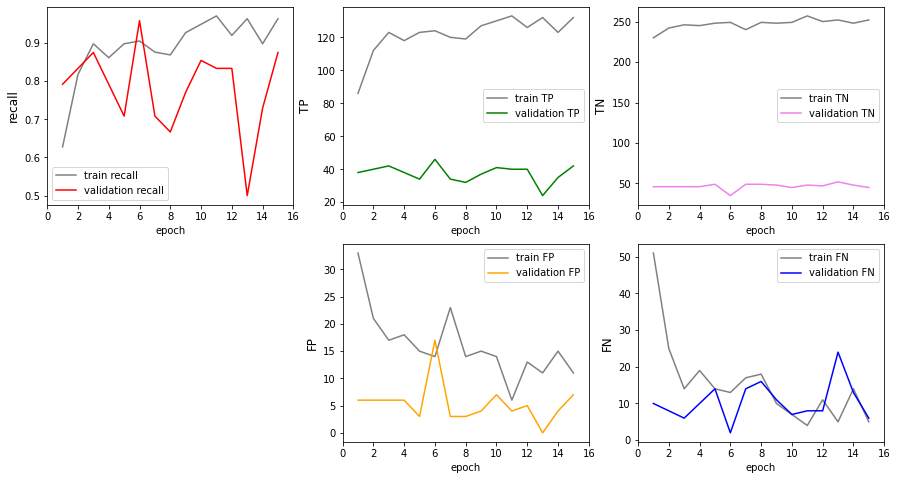

In [203]:
plt.figure(figsize=(15, 8))
start_epoch = 1

# 1. plot the Train/val curve for loss #for the first iteration
plt.subplot(231)
#plt.title('Train/val LOSS')
plt.plot(np.arange(start_epoch,epochs+1), history3.history['recall'][start_epoch-1:],label='train recall', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history3.history['val_recall'][start_epoch-1:],label='validation recall', color = 'red')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('recall', size = 12)
plt.legend()


# 2. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(232)
#plt.title('Train/val ACCURACY')
plt.plot(np.arange(start_epoch,epochs+1), history3.history['true_positives'][start_epoch-1:],label='train TP', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history3.history['val_true_positives'][start_epoch-1:],label='validation TP', color = 'green')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('TP', size = 12)
plt.legend()

# 3. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(233)
#plt.title('Train/val AUC')
plt.plot(np.arange(start_epoch,epochs+1), history3.history['true_negatives'][start_epoch-1:],label='train TN', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history3.history['val_true_negatives'][start_epoch-1:],label='validation TN', color = 'violet')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('TN', size = 12)
plt.legend()

# 4. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(235)
#plt.title('Train/val AUC')
plt.plot(np.arange(start_epoch,epochs+1), history3.history['false_positives'][start_epoch-1:],label='train FP', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history3.history['val_false_positives'][start_epoch-1:],label='validation FP', color = 'orange')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('FP', size = 12)
plt.legend()

# 5. plot the Train/val curve for accuracy  #for the first iteration
plt.subplot(236)
#plt.title('Train/val AUC')
plt.plot(np.arange(start_epoch,epochs+1), history3.history['false_negatives'][start_epoch-1:],label='train FN', color = "gray")
plt.plot(np.arange(start_epoch,epochs+1), history3.history['val_false_negatives'][start_epoch-1:],label='validation FN', color = 'blue')            
plt.xlim([0,epochs+1])
plt.xlabel('epoch')
plt.ylabel('FN', size = 12)
plt.legend()

plt.show()

## Evaluation Metrics:
['loss', 
'accuracy', 
'AUC', 
"Recall", 
"TruePositives", 
"TrueNegatives", 
"FalsePositives", 
"FalseNegatives"]

In [80]:
# evaluate the model
val_scores = model3.evaluate(x_val, y_val, verbose=0)
print(" loss: {} \n accuracy: {} \n auc {} \n Recall {} \n TruePositive {} \n TrueNegative {} \n FalsePositive {} \n FalsNegative {}"
      .format(val_scores[0], val_scores[1], val_scores[2], val_scores[3], 
              val_scores[4], val_scores[5], val_scores[6], val_scores[7]
             ))

 loss: 0.24420574307441711 
 accuracy: 0.9300000071525574 
 auc 0.9787325859069824 
 Recall 0.9722222089767456 
 TruePositive 35.0 
 TrueNegative 58.0 
 FalsePositive 6.0 
 FalsNegative 1.0


In [81]:
# test the model
test_scores = model3.evaluate(X_UAB, Y_UAB, verbose=0)
print(" loss: {} \n accuracy: {} \n auc {} \n Recall {} \n TruePositive {} \n TrueNegative {} \n FalsePositive {} \n FalsNegative {}"
      .format(test_scores[0], test_scores[1], test_scores[2], test_scores[3], 
              test_scores[4], test_scores[5], test_scores[6], test_scores[7]
             ))

 loss: 0.7749242186546326 
 accuracy: 0.7308970093727112 
 auc 0.9095481038093567 
 Recall 0.9347826242446899 
 TruePositive 43.0 
 TrueNegative 177.0 
 FalsePositive 78.0 
 FalsNegative 3.0


In [82]:
df_val = pd.DataFrame(index=['loss', 'accuracy', 'auc', 'recall', 'TP', 'TN', 'FP', 'FN'])
df_val['validation (M3)'] = val_scores

df_test = pd.DataFrame(index=['loss', 'accuracy', 'auc', 'recall', 'TP', 'TN', 'FP', 'FN'])
df_test['test (M3)'] = test_scores

model_3 = pd.concat([df_val, df_test], axis = 1)
model_3

,validation (M3),test (M3)
loss,0.244206,0.774924
accuracy,0.930000,0.730897
auc,0.978733,0.909548
recall,0.972222,0.934783
TP,35.000000,43.000000
TN,58.000000,177.000000
FP,6.000000,78.000000
FN,1.000000,3.000000


### Combine together!~ Yay~ (^_^)

In [83]:
df = pd.concat([model_1, model_2, model_3], axis = 1)
df

,validation (M1),test (M1),validation (M2),test (M2),validation (M3),test (M3)
loss,0.296763,0.378864,0.199720,0.395243,0.244206,0.774924
accuracy,0.940000,0.787375,0.970000,0.797342,0.930000,0.730897
auc,0.980035,0.917008,0.979167,0.902856,0.978733,0.909548
recall,0.916667,0.913043,0.944444,0.869565,0.972222,0.934783
TP,33.000000,42.000000,34.000000,40.000000,35.000000,43.000000
TN,61.000000,195.000000,63.000000,200.000000,58.000000,177.000000
FP,3.000000,60.000000,1.000000,55.000000,6.000000,78.000000
FN,3.000000,4.000000,2.000000,6.000000,1.000000,3.000000


# 10. Save the model

In [204]:
model1.save("VGG1_upsampling.h5")
model2.save("VGG2_upsampling.h5")
model3.save("VGG3_upsampling.h5")

In [205]:
from keras.models import load_model
pretrained_model1 = load_model('VGG1_upsampling.h5')
pretrained_model2 = load_model('VGG2_upsampling.h5')
pretrained_model3 = load_model('VGG3_upsampling.h5')

In [87]:
# evaluate the model
val_scores = pretrained_model3.evaluate(x_val, y_val, verbose=0)
print(" loss: {} \n accuracy: {} \n auc {}"
      .format(val_scores[0], val_scores[1], 
              val_scores[2]))

 loss: 0.40870246291160583 
 accuracy: 0.8299999833106995 
 auc 0.9092600345611572
